In [100]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import librosa
from librosa.display import specshow
from IPython.display import Audio
import warnings; warnings.simplefilter('ignore')

## Add native sample rate and data length to data frame

In [2]:
df = pd.read_csv("../data/xeno-canto_ca-nv_index.csv", index_col='file_id')
display(df.head(1))

i = 0
for file_id, rec in df.iterrows():
    i += 1
    print("Loading %6i/%i "%(i,len(df)), end='\r',)
    sound_data, sr = librosa.load("../data/audio/%s"%(rec['file_name']), None)
    df.loc[file_id,'sample_rate']=sr
    df.loc[file_id,'data_length']=sound_data.shape[0]
    
df.drop('Unnamed: 0', axis='columns').to_csv('../data/xeno-canto_ca-nv_index2.csv')

Unnamed: 0        country  duration_seconds   english_cname  \
file_id                                                                
17804             0  United States                 3  Abert's Towhee   

           file_name                                   file_url     genus  \
file_id                                                                     
17804    XC17804.mp3  https://www.xeno-canto.org/17804/download  Melozone   

         latitude                                            license  \
file_id                                                                
17804     33.3117  http://creativecommons.org/licenses/by-nc-nd/2.5/   

                                                  location  longitude  \
file_id                                                                 
17804    Cibola National Wildlife Refuge, Cibola, Arizo... -114.68912   

              recordist                                      recordist_url  \
file_id                                                                      
17804    Nathan Pieplow  https://www.xeno-canto.org/contributor/EKKJJJRDJY   

                                              sonogram_url species  \
file_id                                                              
17804    https://www.xeno-canto.org/sounds/uploaded/EKK...  aberti   

                type                                            remarks  \
file_id                                                                   
17804    'seet' call  XC17804 © Nathan Pieplow // Cibola National Wi...   

                                full_name  
file_id                                    
17804    Abert's Towhee (Melozone aberti)

## Distribution of Sample Rates
### Load the new csv

In [3]:
df = pd.read_csv("../data/xeno-canto_ca-nv_index2.csv", index_col='file_id')
display(df.head(1))

country  duration_seconds   english_cname    file_name  \
file_id                                                                 
17804    United States                 3  Abert's Towhee  XC17804.mp3   

                                          file_url     genus  latitude  \
file_id                                                                  
17804    https://www.xeno-canto.org/17804/download  Melozone   33.3117   

                                                   license  \
file_id                                                      
17804    http://creativecommons.org/licenses/by-nc-nd/2.5/   

                                                  location  longitude  \
file_id                                                                 
17804    Cibola National Wildlife Refuge, Cibola, Arizo... -114.68912   

              recordist                                      recordist_url  \
file_id                                                                      
17804    Nathan Pieplow  https://www.xeno-canto.org/contributor/EKKJJJRDJY   

                                              sonogram_url species  \
file_id                                                              
17804    https://www.xeno-canto.org/sounds/uploaded/EKK...  aberti   

                type                                            remarks  \
file_id                                                                   
17804    'seet' call  XC17804 © Nathan Pieplow // Cibola National Wi...   

                                full_name  sample_rate  data_length  
file_id                                                              
17804    Abert's Towhee (Melozone aberti)      44100.0     133496.0

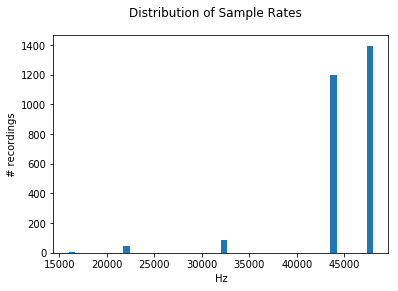

In [6]:
counts, bins, _ = plt.hist(df['sample_rate'], bins=50)
plt.suptitle("Distribution of Sample Rates")
plt.ylabel("# recordings")
plt.xlabel("Hz");

In [7]:
df['sample_rate'].mode()

0    48000.0
dtype: float64

In [15]:
low_res_samples = df.loc[df['sample_rate']<20000]

In [83]:
high_res_samples = df.loc[df['sample_rate']>45000]

In [195]:
def display_sample(file_id, sr=None, fmax=14000):
    data, sr = librosa.load('../data/audio/XC%s.mp3'%file_id, sr)
    print("Loaded data with sample rate: %i Hz, length: %i samples, %f s"%(sr,data.shape[0],data.shape[0]/sr))
    display(Audio(data,rate=sr))
    msg = librosa.feature.melspectrogram(data, sr=sr, fmax=fmax)
    msg[msg==0]=msg[msg>0].min() # Bump 0s up to actual min value
    plt.figure(figsize=(16,4))
    specshow(np.log(msg),y_axis='mel',x_axis='s', sr=sr, fmax=fmax, vmin=-15, vmax=2)
    ax = plt.gca()
    ax.set_title("XC%s.mp3: %iHz, %i x %i"%(file_id, sr, msg.shape[0], msg.shape[1]))
    plt.colorbar()
    plt.show()
    # MFCC
    #mfcc = librosa.feature.mfcc(data, sr=sr)
    #plt.figure(figsize=(10,2))
    #specshow(mfcc, x_axis='s')
    #plt.suptitle("XC%s.mp3 MFCC: %i x %i"%(file_id, *mfcc.shape))
    #plt.show();

### Downsample a high res file

Loaded data with sample rate: 48000 Hz, length: 210956 samples, 4.394917 s


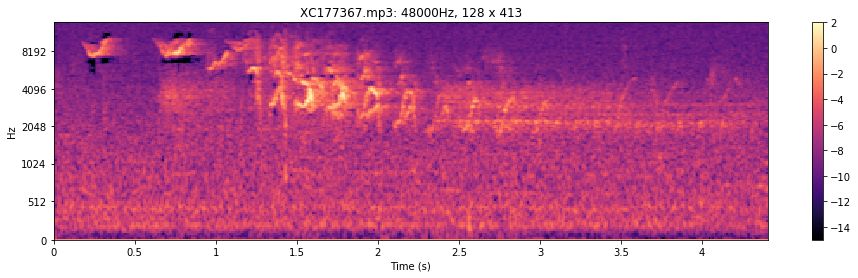

Loaded data with sample rate: 22050 Hz, length: 96908 samples, 4.394921 s


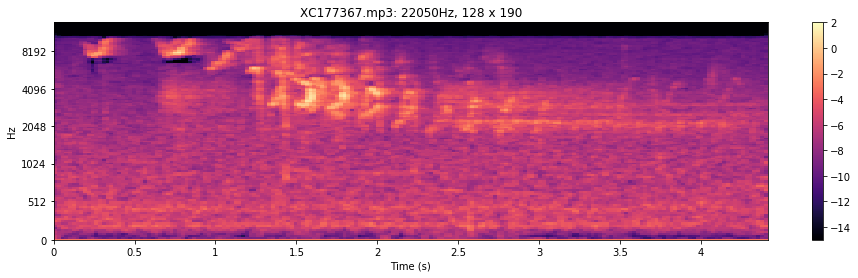

In [196]:
display_sample(high_res_samples.iloc[0].name)
display_sample(high_res_samples.iloc[0].name, 22050)

### Upsample a low res sample

Loaded data with sample rate: 16000 Hz, length: 567215 samples, 35.450938 s


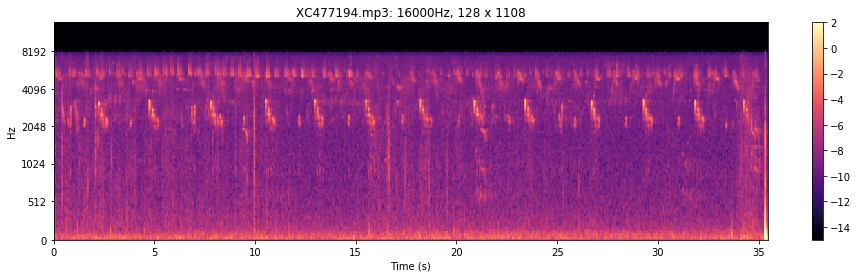

Loaded data with sample rate: 44100 Hz, length: 1563387 samples, 35.450952 s


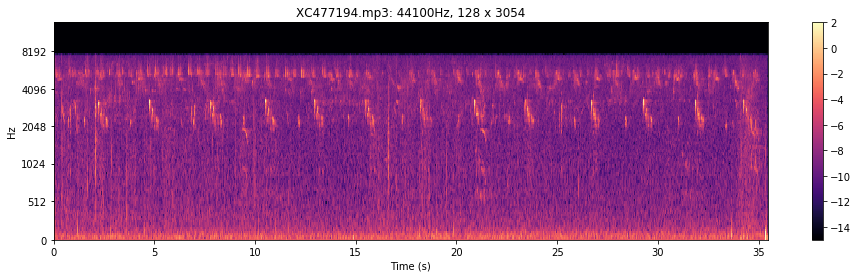

In [167]:
display_sample(low_res_samples.iloc[0].name)
display_sample(low_res_samples.iloc[0].name, 44100)